In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [3]:
# Load the dataset
data = pd.read_csv("card_transdata.csv")

In [4]:
# Load top 5 from dataset
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
# Split the data into features (X) and the target variable (y)
X = data.drop("fraud", axis=1)
y = data["fraud"]

In [6]:
# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
# Display class distribution for the original dataset
print("Original Class Distribution:")
print(y_train.value_counts())

Original Class Distribution:
0.0    467250
1.0     44750
Name: fraud, dtype: int64


In [7]:
# Data Preprocessing: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

When you run this, it should take about 10 minutes to complete. The progress bar (still working on it) does not update, but you will get printed out updates as it goes.

In [9]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV instance with verbose=1
grid_search = GridSearchCV(rf_model, param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)

# Perform grid search for hyperparameter tuning
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  9.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='roc_auc', verbose=1)

In [10]:
print("Best Parameters: ", grid_search.best_params_)
print("Best ROC AUC Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best ROC AUC Score:  0.9999999989421705


In [11]:
# Get the best model
best_rf_model = grid_search.best_estimator_

In [12]:
# Evaluate the best model
y_pred_rf = best_rf_model.predict(X_test)

In [13]:
# Evaluation Metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

In [14]:
# Display Results for Random Forest
print("Random Forest Model Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"ROC AUC: {roc_auc_rf}")

Random Forest Model Metrics:
Accuracy: 0.999975
Precision: 1.0
Recall: 0.999713975173045
F1 Score: 0.9998569671310468
ROC AUC: 0.9998569875865225


In [43]:
# Holdout Test

In [15]:
# Assuming you have split your data into X_train, X_test, y_train, y_test previously

# Split the data into training and holdout test sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Data Preprocessing: Standardize features for both training and holdout sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_holdout = scaler.transform(X_holdout)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Evaluate on the holdout test set
y_pred_holdout = rf_model.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
precision_holdout = precision_score(y_holdout, y_pred_holdout)
recall_holdout = recall_score(y_holdout, y_pred_holdout)
f1_holdout = f1_score(y_holdout, y_pred_holdout)
roc_auc_holdout = roc_auc_score(y_holdout, y_pred_holdout)

# Display Results for Holdout Test Set
print("Holdout Test Set Metrics:")
print(f"Accuracy: {accuracy_holdout}")
print(f"Precision: {precision_holdout}")
print(f"Recall: {recall_holdout}")
print(f"F1 Score: {f1_holdout}")
print(f"ROC AUC: {roc_auc_holdout}")

Holdout Test Set Metrics:
Accuracy: 0.9999875
Precision: 1.0
Recall: 0.9998569794050344
F1 Score: 0.9999284845884289
ROC AUC: 0.9999284897025171


In [49]:
# Display class distribution for the holdout test set
print("Holdout Test Class Distribution:")
print(y_holdout.value_counts())

Holdout Test Class Distribution:
0.0    116812
1.0     11188
Name: fraud, dtype: int64


In [16]:
##Undersample to make dataset more realistic (very few fraudulent transactions)

In [17]:
from imblearn.under_sampling import RandomUnderSampler

In [18]:
# Assuming you have X_train, X_holdout, y_train, y_holdout, and rf_model from previous code
# Split the data into training and holdout test sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [53]:
# Instantiate RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy={1: 874}, random_state=42)  # Adjust the sampling_strategy as needed


In [54]:
# Resample the training data
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)


In [55]:
print("Undersampled Class Distribution:")
print(y_train_resampled.value_counts())

Undersampled Class Distribution:
0.0    467250
1.0       874
Name: fraud, dtype: int64


In [56]:
# Now, you can train a new model with the resampled data
rf_model_resampled = RandomForestClassifier(random_state=42)

In [57]:
# Define the parameter grid for hyperparameter tuning
param_grid_resampled = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV instance with verbose
grid_search_resampled = GridSearchCV(
    rf_model_resampled, param_grid_resampled, cv=5, scoring='roc_auc', verbose=5, n_jobs=-1
)

# Fit the model
grid_search_resampled.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  66 out of  80 | elapsed:  8.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  9.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='roc_auc', verbose=5)

In [58]:
# Print best parameters and score
print("Best Parameters after Undersampling: ", grid_search_resampled.best_params_)
print("Best ROC AUC Score after Undersampling: ", grid_search_resampled.best_score_)

Best Parameters after Undersampling:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best ROC AUC Score after Undersampling:  0.9999876476712343


In [59]:
# Get the best model
best_rf_model_resampled = grid_search_resampled.best_estimator_

In [60]:
# Evaluate on the holdout test set
y_pred_holdout_resampled = best_rf_model_resampled.predict(X_holdout)
accuracy_holdout_resampled = accuracy_score(y_holdout, y_pred_holdout_resampled)
precision_holdout_resampled = precision_score(y_holdout, y_pred_holdout_resampled)
recall_holdout_resampled = recall_score(y_holdout, y_pred_holdout_resampled)
f1_holdout_resampled = f1_score(y_holdout, y_pred_holdout_resampled)
roc_auc_holdout_resampled = roc_auc_score(y_holdout, y_pred_holdout_resampled)

In [61]:
# Display Results for Holdout Test Set after Undersampling
print("Holdout Test Set Metrics after Undersampling:")
print(f"Accuracy: {accuracy_holdout_resampled}")
print(f"Precision: {precision_holdout_resampled}")
print(f"Recall: {recall_holdout_resampled}")
print(f"F1 Score: {f1_holdout_resampled}")
print(f"ROC AUC: {roc_auc_holdout_resampled}")

Holdout Test Set Metrics after Undersampling:
Accuracy: 0.998171875
Precision: 1.0
Recall: 0.9790847336431892
F1 Score: 0.9894318489747991
ROC AUC: 0.9895423668215946


In [31]:
# Test on synthetic data

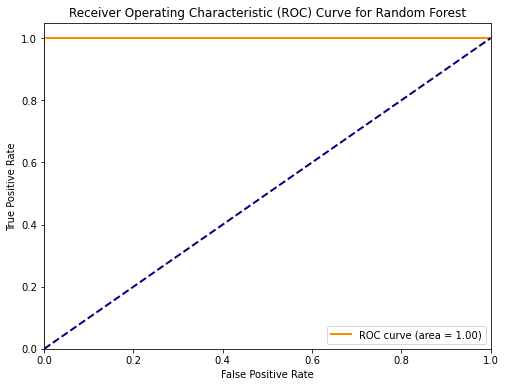

In [32]:
# Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [33]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Number of synthetic data points
num_samples = 1000

# Create synthetic data for each feature
data = {
    'distance_from_home': np.random.normal(30, 10, num_samples),
    'distance_from_last_transaction': np.random.normal(1.0, 1.0, num_samples),
    'ratio_to_median_purchase_price': np.random.normal(1.0, 0.5, num_samples),
    'repeat_retailer': np.random.choice([0, 1], num_samples),
    'used_chip': np.random.choice([0, 1], num_samples),
    'used_pin_number': np.random.choice([0, 1], num_samples),
    'online_order': np.random.choice([0, 1], num_samples),
    'fraud': np.random.choice([0, 1], num_samples)
}

# Create a synthetic dataset
synthetic_df = pd.DataFrame(data)

# Split the synthetic data into features (X) and the target variable (y)
X = synthetic_df.drop("fraud", axis=1)
y = synthetic_df["fraud"]

# Display the first few rows of the synthetic dataset
synthetic_df.head()



,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,34.967142,2.399355,0.662411,1,1,0,1,1
1,28.617357,1.924634,0.927741,1,1,1,1,0
2,36.476885,1.059630,0.603790,1,0,0,0,0
3,45.230299,0.353063,0.846019,1,0,0,1,1
4,27.658466,1.698223,0.053193,0,1,1,0,0


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train your model on the synthetic data (X, y)
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [35]:
# Make predictions on the same data
y_pred = rf_model.predict(X)

# Calculate evaluation metrics on the synthetic data
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)

In [36]:
# Display Results for Random Forest
print("Random Forest Model Metrics on Synthetic Data:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Random Forest Model Metrics on Synthetic Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


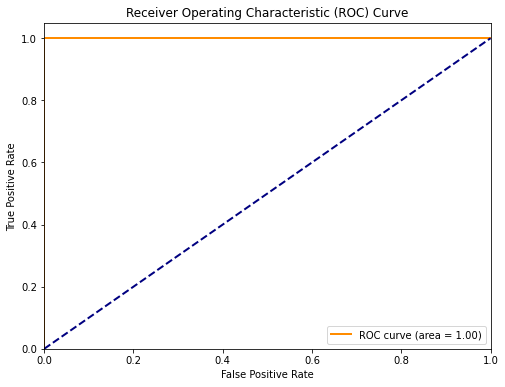

In [37]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, rf_model.predict_proba(X)[:, 1])

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y, rf_model.predict_proba(X)[:, 1])

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

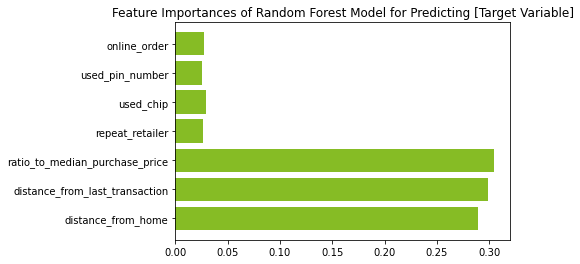

In [38]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Fit your Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importance = model.feature_importances_

# Define a list of feature names
feature_names = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

# Define Deloitte green color in RGB
deloitte_green_rgb = (134/255, 188/255, 37/255)

# Plot the feature importances with Deloitte green color
plt.barh(range(len(feature_importance)), feature_importance, tick_label=feature_names, color=deloitte_green_rgb)

# Add a title to the plot
plt.title("Feature Importances of Random Forest Model for Predicting [Target Variable]")

plt.show()

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

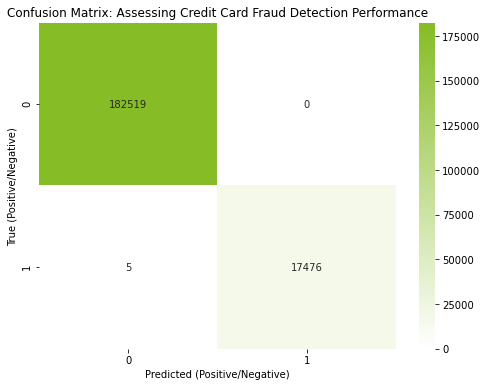

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define Deloitte green color in RGB
deloitte_green_rgb = (134/255, 188/255, 37/255)

# Define your custom gradient from Deloitte green to white
custom_gradient = {
    'red':   ((0.0, 1.0, 1.0),
              (1.0, deloitte_green_rgb[0], deloitte_green_rgb[0])),
    'green': ((0.0, 1.0, 1.0),
              (1.0, deloitte_green_rgb[1], deloitte_green_rgb[1])),
    'blue':  ((0.0, 1.0, 1.0),
              (1.0, deloitte_green_rgb[2], deloitte_green_rgb[2]))
}

# Create a custom colormap using the defined gradient
custom_cmap = LinearSegmentedColormap('custom_colormap', custom_gradient)

# Assuming 'conf_matrix' is your confusion matrix
plt.figure(figsize=(8, 6))

# Plot the heatmap using the custom colormap
heatmap = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=custom_cmap)

# Customize the colorbar
cbar = heatmap.collections[0].colorbar
# Add ticks from 0 to 175000, increasing by 25000
cbar.set_ticks(np.arange(0, 200000, 25000))

plt.xlabel('Predicted (Positive/Negative)')
plt.ylabel('True (Positive/Negative)')
plt.title('Confusion Matrix: Assessing Credit Card Fraud Detection Performance')
plt.show()